In [1]:
%matplotlib inline

Absolute Errors
   h          3-points           5-points     
1.0e+00   1.1666666667e+00   1.0000000000e+00
1.0e-01   1.0016666667e+00   1.0000000000e+00
1.0e-02   1.0000166667e+00   1.0000000000e+00
1.0e-03   1.0000001666e+00   9.9999999995e-01
1.0e-04   1.0000000022e+00   1.0000000013e+00
1.0e-05   1.0000003603e+00   1.0000004528e+00
1.0e-06   9.9997787828e-01   9.9994087085e-01
1.0e-07   1.0019762797e+00   1.0029014656e+00
1.0e-08   8.3266726847e-01   7.4014868308e-01
1.0e-09   2.7755575616e+01   3.7007434154e+01


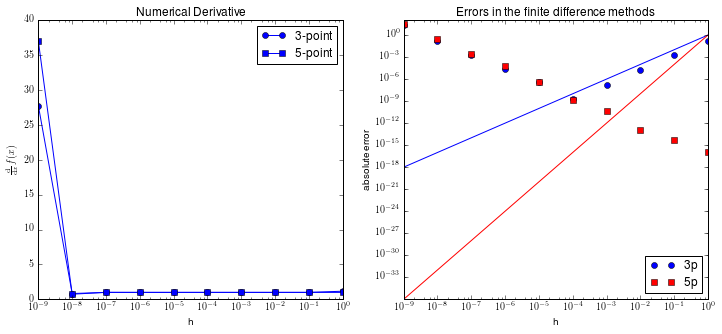

In [4]:
# %load problem02_2.py
#!/usr/bin/env python3
"""
%**************************************************************************
%*  Problem 2.2                                                           *
%*                                                                        *
%*  This program evaluates the second-order derivative of a given         *
%*  function f(x) at x=1 using the 3-point and 5-point methods.           *
%*  The derivative and numerical errors are plotted.                      *
%*                                                                        *
%*     Programed by Ryoichi Kawai for Computational Physics Course.       *
%*     Last modification:  01/16/2017.                                    *
%**************************************************************************
"""
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4/12.

if __name__ == "__main__":
    x=1.0    # the point at which derivative is evaluated.
    imax=10  # number of different displacements
    h=np.zeros(imax)
    s3=np.zeros(imax)
    s5=np.zeros(imax)
    err_s3=np.zeros(imax)
    err_s5=np.zeros(imax) 
    
# title and headers
    print('Absolute Errors')
    print("{0:^8s} {1:^18s} {2:^18}".format('h','3-points','5-points'))

    for i in range(0,imax):
    
        # Small displacement
        h[i]=10**(-i)
    
        # Evaluation of numerical derivative
        s3[i]=(f(x+h[i])+f(x-h[i])-2*f(x))/h[i]**2
        s5[i]=(16*(f(x+h[i])+f(x-h[i]))-f(x+2*h[i])-f(x-2*h[i])-30*f(x))/(12*h[i]**2)
   
        # Errors
        err_s3[i]=abs(1-s3[i])
        err_s5[i]=abs(1-s5[i])
    
        # Display the errors
        print("{0:6.1e} {1:18.10e} {2:18.10e}".format(h[i],s3[i],s5[i]))

    h2 = h**2 
    h4 = h**4

    # Plot data
    plt.ioff()
    plt.rc('text', usetex=True)
    plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics}')
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.semilogx(h,s3,'-ob',label="3-point")
    plt.semilogx(h,s5,'-sb',label="5-point") 
    plt.title("Numerical Derivative")
    plt.legend(loc=1)
    plt.xlabel("h")
    plt.ylabel("$\dv{x} f(x)$")
    
    plt.subplot(1,2,2) 
    plt.loglog(h,err_s3,'ob',label="3p")
    plt.loglog(h,err_s5,'sr',label="5p")
    plt.loglog(h,h2,'-b')
    plt.loglog(h,h4,'-r')
    plt.legend(loc=4)    
    plt.title("Errors in the finite difference methods")
    plt.xlabel('h')
    plt.ylabel('absolute error')
    plt.show()
